# Bank Marketing

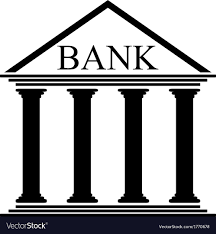

In [61]:
from IPython.display import Image
Image("bank.jpg")

#### Abstract:
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

#### Data Set Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In [62]:
import pandas as pd 
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [63]:
df = pd.read_csv('bank-additional-full.csv', sep=";", encoding='ISO-8859-1')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


 ## Input variables:
 
   #### Bank client data:
   * 1 - age (numeric)
   * 2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   * 3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   * 4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   * 5 - default: has credit in default? (categorical: "no","yes","unknown")
   * 6 - housing: has housing loan? (categorical: "no","yes","unknown")
   * 7 - loan: has personal loan? (categorical: "no","yes","unknown")
   #### Related with the last contact of the current campaign:
   * 8 - contact: contact communication type (categorical: "cellular","telephone") 
   * 9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   * 10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
   * 11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   #### Other attributes:
   * 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   * 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
   * 14 - previous: number of contacts performed before this campaign and for this client (numeric)
   * 15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   #### Social and economic context attributes
   * 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
   * 17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
   * 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
   * 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
   * 20 - nr.employed: number of employees - quarterly indicator (numeric)

   #### Output variable (desired target):
   * 21 - y - has the client subscribed a term deposit? (binary: "yes","no")

## Dataset Analysis

In [64]:
# Information about attribute types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [65]:
df.shape

(41188, 21)

In [66]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [67]:
# Statistical description of numeric dataset attributes
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Duplicated Values

In [68]:
# Removing Duplicate Values

print(df.duplicated().sum()) # 12 duplicate values 
df = df.drop_duplicates() # Values have been removed

12


## Hidden Missing Values

In [69]:
# Checking for null values
df.isnull().values.any()

False

> As stated in the description of the variables above, there are several missing values in some $categorical$ attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

In [70]:
print("# Missing job: {0}".format(len(df.loc[df['job'] == "unknown"])))
print("# Missing marital: {0}".format(len(df.loc[df['marital'] == "unknown"])))
print("# Missing education: {0}".format(len(df.loc[df['education'] == "unknown"])))
print("# Missing default: {0}".format(len(df.loc[df['default'] == "unknown"])))
print("# Missing housing:: {0}".format(len(df.loc[df['housing'] == "unknown"])))
print("# Missing loan: {0}".format(len(df.loc[df['loan'] == "unknown"])))
print("# Missing contact: {0}".format(len(df.loc[df['contact'] == "unknown"])))
print("# Missing month: {0}".format(len(df.loc[df['month'] == "unknown"])))
print("# Missing day_of_week: {0}".format(len(df.loc[df['day_of_week'] == "unknown"])))
print("# Missing poutcome: {0}".format(len(df.loc[df['poutcome'] == "unknown"])))

# Missing job: 330
# Missing marital: 80
# Missing education: 1730
# Missing default: 8596
# Missing housing:: 990
# Missing loan: 990
# Missing contact: 0
# Missing month: 0
# Missing day_of_week: 0
# Missing poutcome: 0


## Outliers Analysis

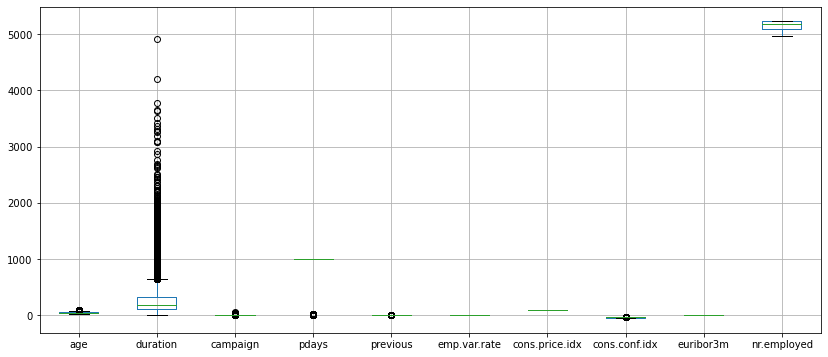

In [71]:
# Outliers are mainly found in duration. Changes will need to be made.

plt.figure(figsize=(14,6))
df.boxplot()
print()

### Removing outliers in 'duration' using IQR method.

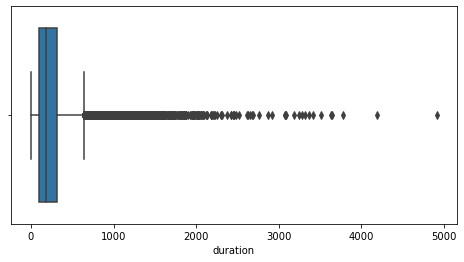

In [72]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['duration'])
plt.show()

In [73]:
Q1 = df['duration'].quantile(.25)
Q3 = df['duration'].quantile(.75)

Q1,Q3

(102.0, 319.0)

In [74]:
IQR = Q3 - Q1
IQR

217.0

In [75]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

lower,upper

(-223.5, 644.5)

#### Defining lower / upper

In [76]:
df = df[df['duration'] >= lower] 

In [77]:
df = df[df['duration'] <= upper]

In [78]:
# There were 41188 lines. Now, we have 38213 lines.
df.shape

(38213, 21)

In [79]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,38213.000000,38213.000000,38213.000000,38213.000000,38213.000000,38213.000000,38213.000000,38213.000000,38213.000000,38213.000000
mean,40.049250,203.270746,2.575720,963.320415,0.173239,0.081846,93.574332,-40.480967,3.622748,5167.128906
std,10.424753,141.025687,2.810393,184.821857,0.494584,1.571702,0.579752,4.631815,1.733697,72.080748
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,97.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,167.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,277.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,644.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


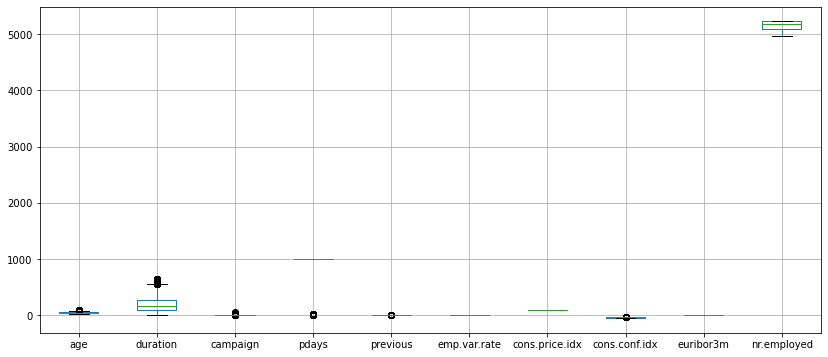

In [80]:
plt.figure(figsize=(14,6))
df.boxplot()
print()

## Correlations

In [84]:
# Term Deposit Subscription (Target). Tranforming Yes = 1 / No = 0
df['y'] = 1 * (df['y']== 'yes')

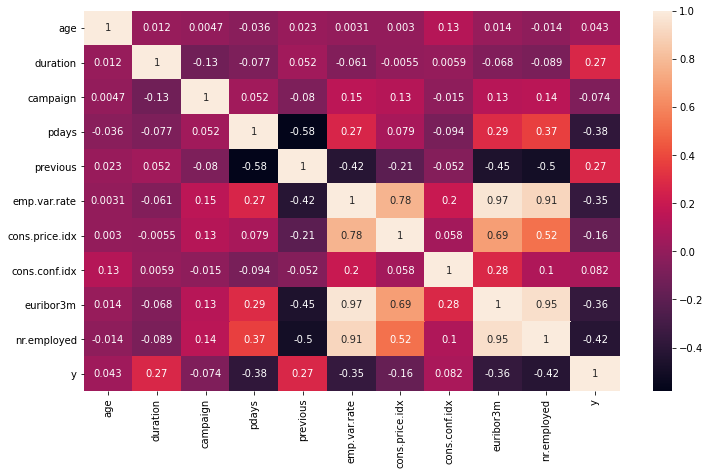

In [85]:
# Correlation between columns

plt.figure(figsize=(12,7))
correlacao = df.corr()
sns.heatmap(correlacao, annot = True);

In [86]:
# Analyzing the correlations between numeric columns with the target variable (y)

df.corr()['y'].drop('y').sort_values()

nr.employed      -0.418449
pdays            -0.381017
euribor3m        -0.360156
emp.var.rate     -0.353347
cons.price.idx   -0.163782
campaign         -0.073773
age               0.043468
cons.conf.idx     0.081780
duration          0.271775
previous          0.272292
Name: y, dtype: float64

## Data Balancing

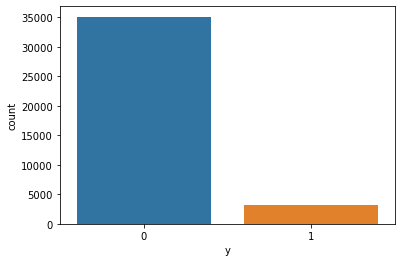

In [87]:
#Target distribution

sns.countplot(df['y']);

In [88]:
df_classe_majority = df[df.y==0]
df_classe_minority = df[df.y==1]

In [89]:
df_classe_majority.shape

(35100, 21)

In [90]:
df_classe_minority.shape

(3113, 21)

In [91]:
# Upsample of minority class
from sklearn.utils import resample
df_classe_minority_upsampled = resample(df_classe_minority, 
                                           replace = True,     
                                           n_samples = 35100,   
                                           random_state = 150) 

In [92]:
df_balanced_data = pd.concat([df_classe_majority, df_classe_minority_upsampled])

In [93]:
df_balanced_data.y.value_counts()

0    35100
1    35100
Name: y, dtype: int64

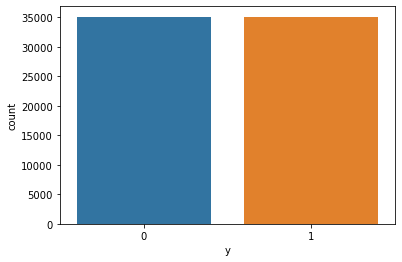

In [94]:
sns.countplot(df_balanced_data['y'])

> Balanced data. Saving the dataset with the manipulated data.

In [95]:
df_balanced_data.to_csv('df_modified.csv', encoding = 'utf-8', index = False) #df2

## Business Questions

In [96]:
df2 = pd.read_csv('df_modified.csv')
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


### 1 - What is the average duration (in seconds) of the call for those who did not make a term deposit (0) ? And for those who made term deposits (1)?
> For those who made term deposits (1), the average time was 331.72 seconds. For those who did not make a term deposit (0), the average time was 191.86 seconds. It means that, for a customer to make a term deposit, more time is needed to convince him/her.

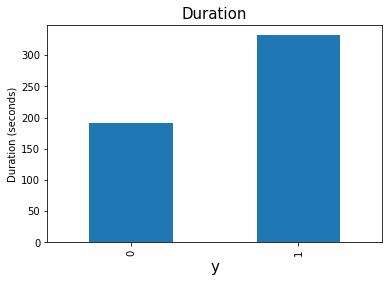

y
0    191.856724
1    331.720085
Name: duration, dtype: float64


In [97]:
time = df2.groupby('y').duration.mean()
time.plot.bar()
plt.title('Duration', fontsize = 15)
plt.xlabel('y', fontsize = 15)
plt.ylabel('Duration (seconds)')
plt.show()

print(time)

### 2 - In which month do customers usually make the most deposits?
> May is the month when most customers make a term deposit

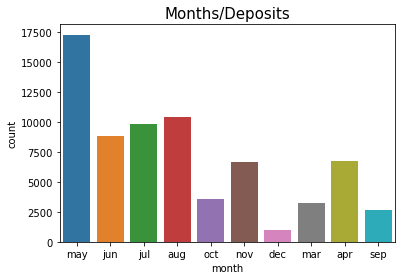

In [98]:
plt.title('Months/Deposits', fontsize = 15)
sns.countplot(df2['month'])
plt.show()

### 3 - Among those who made bank deposits, what was the main form of contact?
> The main form of contact is the cellular. Few customers who made term bank deposits were contacted by telephone.

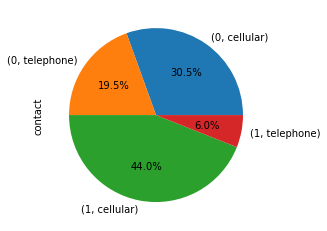

In [99]:
df2.groupby('y').contact.value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

### 4 - What type of job is most common among those who made bank deposits?
> Admin.

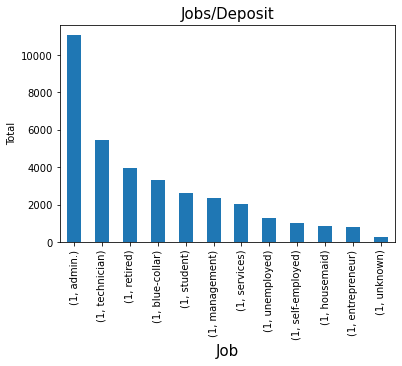

In [100]:
jobs = df2[df2['y'] == 1].groupby('y').job.value_counts()
jobs.plot.bar()

plt.title('Jobs/Deposit', fontsize = 15)
plt.xlabel('Job', fontsize = 15)
plt.ylabel('Total')

plt.show()

### 5 - What is the Age Distribution of Customers?
> Between 25 and 42 years old

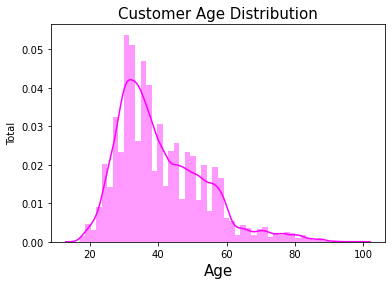

In [101]:
sns.distplot(df2['age'], color = 'magenta')
plt.title('Customer Age Distribution', fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Total')
plt.show()

##  Spliting

In [102]:
# Turning All Categorical Attributes to Numeric

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_var =['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for i in cat_var:
    df2[i]= le.fit_transform(df2[i]) 

df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


### Checking again for missing values
> We didn't generate missing values by accident, fortunately

In [105]:
df2.isnull().values.any()

False

In [106]:
df2.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Train_test_split

In [107]:
from sklearn.model_selection import train_test_split

X = df2.reset_index(drop=True).drop(['y'],axis=1)

y = df2['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [108]:
X.shape

(70200, 20)

In [109]:
y.shape

(70200,)

In [110]:
# Printing the results

print("{0:0.2f}% training data".format((len(X_train)/len(df2.index)) * 100))
print("{0:0.2f}% test data".format((len(X_test)/len(df2.index)) * 100))

70.00% training data
30.00% test data


## Developing and training the model

In [44]:
# Model evaluation metrics

from sklearn import metrics

###  Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train.ravel())

nb_predict_test = nb.predict(X_test)

print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test, labels = [1, 0])))
print("")

accuracy_nb = metrics.accuracy_score(y_test, nb_predict_test)
print("Accuracy: {0:.4f}".format(accuracy_nb))
print()

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test, labels = [1, 0]))

Confusion Matrix
[[8948 1622]
 [2326 8164]]

Accuracy: 0.8125

Classification Report
              precision    recall  f1-score   support

           1       0.79      0.85      0.82     10570
           0       0.83      0.78      0.81     10490

    accuracy                           0.81     21060
   macro avg       0.81      0.81      0.81     21060
weighted avg       0.81      0.81      0.81     21060



### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 0.7, random_state = 42, max_iter = 1000)
lr.fit(X_train, y_train.ravel())

lr_predict_test = lr.predict(X_test)

print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test, labels = [1, 0])))
print("")

accuracy_lr = metrics.accuracy_score(y_test, lr_predict_test)
print("Accuracy: {0:.4f}".format(accuracy_lr))
print()

print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels = [1, 0]))

Confusion Matrix
[[9351 1219]
 [1690 8800]]

Accuracy: 0.8619

Classification Report
              precision    recall  f1-score   support

           1       0.85      0.88      0.87     10570
           0       0.88      0.84      0.86     10490

    accuracy                           0.86     21060
   macro avg       0.86      0.86      0.86     21060
weighted avg       0.86      0.86      0.86     21060



### Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, y_train.ravel())

rfc_predict_test = rfc.predict(X_test)

print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rfc_predict_test, labels = [1, 0])))
print("")

accuracy_rfc = metrics.accuracy_score(y_test, rfc_predict_test)
print("Accuracy: {0:.4f}".format(accuracy_rfc))
print()

print("Classification Report")
print(metrics.classification_report(y_test, rfc_predict_test, labels = [1, 0]))

Confusion Matrix
[[10570     0]
 [  475 10015]]

Accuracy: 0.9774

Classification Report
              precision    recall  f1-score   support

           1       0.96      1.00      0.98     10570
           0       1.00      0.95      0.98     10490

    accuracy                           0.98     21060
   macro avg       0.98      0.98      0.98     21060
weighted avg       0.98      0.98      0.98     21060



### Decision Tree Classifier

In [48]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train.ravel())

dtc_predict_test = dtc.predict(X_test)

print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, dtc_predict_test, labels = [1, 0])))
print("")

accuracy_dtc = metrics.accuracy_score(y_test, dtc_predict_test)
print("Accuracy: {0:.4f}".format(accuracy_dtc))
print()

print("Classification Report")
print(metrics.classification_report(y_test, dtc_predict_test, labels = [1, 0]))

Confusion Matrix
[[10570     0]
 [  554  9936]]

Accuracy: 0.9737

Classification Report
              precision    recall  f1-score   support

           1       0.95      1.00      0.97     10570
           0       1.00      0.95      0.97     10490

    accuracy                           0.97     21060
   macro avg       0.98      0.97      0.97     21060
weighted avg       0.98      0.97      0.97     21060



### Support Vector Machine Classifier

In [49]:
from sklearn import svm

svmc = svm.SVC()
svmc.fit(X_train, y_train.ravel())

svmc_predict_test = svmc.predict(X_test)

print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, svmc_predict_test, labels = [1, 0])))
print("")

accuracy_svmc = metrics.accuracy_score(y_test, svmc_predict_test)
print("Accuracy: {0:.4f}".format(accuracy_svmc))
print()

print("Classification Report")
print(metrics.classification_report(y_test, svmc_predict_test, labels = [1, 0]))

Confusion Matrix
[[9100 1470]
 [1984 8506]]

Accuracy: 0.8360

Classification Report
              precision    recall  f1-score   support

           1       0.82      0.86      0.84     10570
           0       0.85      0.81      0.83     10490

    accuracy                           0.84     21060
   macro avg       0.84      0.84      0.84     21060
weighted avg       0.84      0.84      0.84     21060



### Gradient Boosting Classifier

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

gb= GradientBoostingClassifier()
gb.fit(X_train, y_train.ravel())

gb_predict_test = gb.predict(X_test)

print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, gb_predict_test, labels = [1, 0])))
print("")

accuracy_gb = metrics.accuracy_score(y_test, gb_predict_test)
print("Accuracy: {0:.4f}".format(accuracy_gb))
print()

print("Classification Report")
print(metrics.classification_report(y_test, gb_predict_test, labels = [1, 0]))

Confusion Matrix
[[9958  612]
 [1560 8930]]

Accuracy: 0.8969

Classification Report
              precision    recall  f1-score   support

           1       0.86      0.94      0.90     10570
           0       0.94      0.85      0.89     10490

    accuracy                           0.90     21060
   macro avg       0.90      0.90      0.90     21060
weighted avg       0.90      0.90      0.90     21060



## Comparing and evaluating models

In [51]:
# Table summary for better viewing

results = pd.DataFrame([
    {'Algorithm' : 'Naive Bayes', 'Accuracy' : accuracy_nb*100},
    {'Algorithm' : 'Logistic Regression', 'Accuracy' : accuracy_lr*100},
    {'Algorithm' : 'Random Forest', 'Accuracy' : accuracy_rfc*100},
    {'Algorithm' : 'Decision Tree', 'Accuracy' : accuracy_dtc*100},
    {'Algorithm' : 'Support Vector Machine', 'Accuracy' : accuracy_svmc*100},
    {'Algorithm' : 'Gradient Boosting', 'Accuracy' : accuracy_gb*100}
])

results.sort_values(by=['Accuracy'], ascending=False)

,Algorithm,Accuracy
2,Random Forest,97.744539
3,Decision Tree,97.369421
5,Gradient Boosting,89.686610
1,Logistic Regression,86.187085
4,Support Vector Machine,83.599240
0,Naive Bayes,81.253561


> Random Forest Classifier was the model that achieved the best accuracy, with 97.74%. It will be the model used to predict whether or not the customer will be able to sign a term deposit. The model will be saved and ready to make predictions.

## Making Predictions with the Trained Model

In [52]:
import pickle

# Saving the model

filename = 'rfc.sav'
pickle.dump(rfc, open(filename, 'wb'))

In [53]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X_test)
result[:50]

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0], dtype=int64)

In [54]:
real_full=df2['y']
real=real_full[:1000]

pred = rfc.predict(X_test)

df3=pd.DataFrame({'real': real, 'prediction':pred[:1000]})

In [55]:
# Real x Prediction for the first 1000 lines

df3.head()

,real,prediction
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [56]:
# How many of the predictions are the same or different from the real ones in the first 1000 lines

print(df3[df3['real'] == df3['prediction']].value_counts())
print(df3[df3['real'] != df3['prediction']].value_counts())

real  prediction
0     0             480
dtype: int64
real  prediction
0     1             520
dtype: int64


## Classification Test

In [57]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [64]:
# Putting all the necessary variables for the classification test, except the target variable (y).

test = np.array([[45,1,1,4,0,0,0,1,3,2,600,1,7,0,1,1.1,93.200,-36.4,4.961,5008.7]])

In [65]:
rfc.predict(test)

array([0], dtype=int64)

In [66]:
# Probability of the sample to be Class 0 (No) or Class 1 (Yes)

rfc.predict_proba(test)

array([[0.54, 0.46]])

## Conclusion

* Random Forest Classifier was the model that achieved the best accuracy, with 97.74%;


* From the model, it will be possible to predict whether or not the customer will subscribe a term deposit, placing all the necessary variables for the classification test;


* The 'duration' outliers were removed. In this case, there would need to be an agreement with the bank's business area, which would (or not) guide the removal of outliers, in case they were unnecessary;


* The same case would apply to the 'unknown' values, found in several columns of the dataset. Who should decide the exclusion or imputation of these data would be the business area;


* Other models can and should be tested;